In [20]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4f1dc377-a014-4588-96ac-ba7d3d03fc01',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2023-03-02T17:16:13.192Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 8998}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9995, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [10]:
type(data)

dict

In [21]:
import pandas as pd
#pd.set_option('display.max_columns', None)

In [29]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\rokzu\AppData\Local\Temp\ipykernel_2596\644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9995,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.930619e+07,1.930619e+07,...,42.3770,4.890028e+11,None,2023-03-02T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-02 17:47:35.481174
1,1027,Ethereum,ETH,ethereum,6516,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,18.7493,1.989042e+11,None,2023-03-02T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-02 17:47:35.481174
2,825,Tether,USDT,tether,48675,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.106281e+10,7.314177e+10,...,6.6990,7.314726e+10,None,2023-03-02T17:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-02 17:47:35.481174
3,1839,BNB,BNB,bnb,1204,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578948e+08,1.599800e+08,...,4.4246,4.755872e+10,None,2023-03-02T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-02 17:47:35.481174
4,3408,USD Coin,USDC,usd-coin,10413,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.293257e+10,4.293257e+10,...,4.0484,4.294460e+10,None,2023-03-02T17:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-02 17:47:35.481174
5,52,XRP,XRP,xrp,897,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,...,1.8032,3.754552e+10,None,2023-03-02T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-02 17:47:35.481174
6,2010,Cardano,ADA,cardano,660,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.467096e+10,3.553818e+10,...,1.1339,1.561379e+10,None,2023-03-02T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-02 17:47:35.481174
7,74,Dogecoin,DOGE,dogecoin,649,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,1.0009,1.061854e+10,None,2023-03-02T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-02 17:47:35.481174
8,3890,Polygon,MATIC,polygon,596,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,...,0.9848,1.196076e+10,None,2023-03-02T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-02 17:47:35.481174
9,4687,Binance USD,BUSD,binance-usd,6337,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.008653e+10,1.008653e+10,...,0.9511,1.008999e+10,None,2023-03-02T17:13:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-03-02 17:47:35.481174


In [30]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '4f1dc377-a014-4588-96ac-ba7d3d03fc01',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    
    if not os.path.isfile(r'API.csv'):
        df.to_csv(r'API.csv', header = 'column_names')
    else: 
        df.to_csv(r'API.csv', mode = 'a', header = False)


In [65]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

C:\Users\rokzu\AppData\Local\Temp\ipykernel_2596\1968993019.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\rokzu\AppData\Local\Temp\ipykernel_2596\1968993019.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\rokzu\AppData\Local\Temp\ipykernel_2596\1968993019.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\rokzu\AppData\Local\Temp\ipykernel_2596\1968993019.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\rokzu\AppData\Local\Temp\ipykernel_2596\1968993019.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: 

In [67]:
df = pd.read_csv(r'API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9995,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19306187.00000,19306187.00000,NaN,1,NaN,NaN,NaN,2023-03-02T17:45:00.000Z,23271.64470,21040235374.06564,-16.53700,-0.08604,-1.95823,-2.70625,0.43171,40.30699,37.27963,449286724364.28101,42.33090,488704538687.52002,NaN,2023-03-02T17:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-02 17:47:54.683718
1,1,1027,Ethereum,ETH,ethereum,6516,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-02T17:45:00.000Z,1625.29360,7036372061.29554,-12.83300,0.08109,-1.97135,-1.93095,1.91287,35.37455,26.89171,198893461014.24460,18.73930,198893461014.23999,NaN,2023-03-02T17:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-02 17:47:54.683718
2,2,825,Tether,USDT,tether,48675,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,71062808809.48134,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-03-02T17:45:00.000Z,1.00008,29715026565.01321,-15.55880,-0.00262,-0.00995,-0.00344,-0.00092,0.04206,0.00172,71068628210.35786,6.69730,73147755969.92000,NaN,2023-03-02T17:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-02 17:47:54.683718
3,3,1839,BNB,BNB,bnb,1204,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157894817.26532,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-02T17:45:00.000Z,297.34997,370351983.51455,-5.32040,0.06981,-1.80849,-3.75315,-4.80630,21.29568,2.47091,46950018951.19566,4.42350,47570037145.43000,NaN,2023-03-02T17:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-02 17:47:54.683718
4,4,3408,USD Coin,USDC,usd-coin,10413,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,42932567659.56862,42932567659.56862,NaN,5,NaN,NaN,NaN,2023-03-02T17:45:00.000Z,1.00025,3568207954.39359,-5.00000,0.03109,0.01918,0.01611,0.00591,0.01326,0.02130,42943302223.86349,4.04910,42943302223.86000,NaN,2023-03-02T17:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-02 17:47:54.683718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,10,5426,Solana,SOL,solana,436,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,378851963.49476,539312704.88753,NaN,11,NaN,NaN,NaN,2023-03-02T19:17:00.000Z,22.03780,333790472.68753,-11.31020,0.96400,-1.42198,-7.67368,-8.74394,120.22630,61.84923,8349064128.38556,0.78080,11885265993.67000,NaN,2023-03-02T19:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-02 19:18:37.620627
101,11,6636,Polkadot,DOT,polkadot-new,475,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1162502055.65079,1288925725.95597,NaN,12,904869778.00000,5705148134.55488,NaN,2023-03-02T19:17:00.000Z,6.30494,220829645.39281,-18.19100,0.61692,-2.14173,-11.45485,0.26665,44.25609,12.38119,7329503753.42551,0.68580,8126597196.42000,NaN,2023-03-02T19:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-02 19:18:37.620627
102,12,2,Litecoin,LTC,litecoin,880,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.00000,72394814.83883,84000000.00000,NaN,13,NaN,NaN,NaN,2023-03-02T19:17:00.000Z,94.84273,465148894.41951,-15.79300,0.3732

In [68]:
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [69]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.48103,-1.20421,-2.21597,1.04755,40.98161,38.07356
Ethereum,0.71842,-1.12874,-0.91989,2.68248,36.17140,27.72034
Tether,0.00115,-0.00225,-0.00240,-0.00148,0.04821,0.00351
BNB,0.44975,-1.22808,-3.30937,-4.46952,21.91265,3.10630
USD Coin,0.00612,0.02826,0.01664,0.02702,0.02064,0.02758
XRP,0.65526,-1.29608,-2.90468,-7.04072,11.45867,-3.12638
Cardano,0.46394,-3.41049,-9.09915,-10.50036,40.01123,9.57376
Dogecoin,0.45126,-1.62663,-4.65179,-15.26119,14.68011,-18.52533
Polygon,1.21390,-1.42174,-10.32514,8.33488,59.51607,31.92054


In [70]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     0.48103
         quote.USD.percent_change_24h   -1.20421
         quote.USD.percent_change_7d    -2.21597
         quote.USD.percent_change_30d    1.04755
         quote.USD.percent_change_60d   40.98161
                                          ...   
TRON     quote.USD.percent_change_24h   -0.95285
         quote.USD.percent_change_7d    -0.44577
         quote.USD.percent_change_30d   11.36473
         quote.USD.percent_change_60d   26.56886
         quote.USD.percent_change_90d   28.07329
Length: 90, dtype: float64

In [46]:
type(df4)

pandas.core.series.Series

In [71]:
df5 = df4.to_frame(name='values')
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.48103
        quote.USD.percent_change_24h -1.20421
        quote.USD.percent_change_7d  -2.21597
        quote.USD.percent_change_30d  1.04755
        quote.USD.percent_change_60d 40.98161
...                                       ...
TRON    quote.USD.percent_change_24h -0.95285
        quote.USD.percent_change_7d  -0.44577
        quote.USD.percent_change_30d 11.36473
        quote.USD.percent_change_60d 26.56886
        quote.USD.percent_change_90d 28.07329

[90 rows x 1 columns]

In [48]:
type(df5)

pandas.core.frame.DataFrame

In [72]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.48103
1,Bitcoin,quote.USD.percent_change_24h,-1.20421
2,Bitcoin,quote.USD.percent_change_7d,-2.21597
3,Bitcoin,quote.USD.percent_change_30d,1.04755
4,Bitcoin,quote.USD.percent_change_60d,40.98161
...,...,...,...
85,TRON,quote.USD.percent_change_24h,-0.95285
86,TRON,quote.USD.percent_change_7d,-0.44577
87,TRON,quote.USD.percent_change_30d,11.36473
88,TRON,quote.USD.percent_change_60d,26.56886


In [73]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.48103
1,Bitcoin,quote.USD.percent_change_24h,-1.20421
2,Bitcoin,quote.USD.percent_change_7d,-2.21597
3,Bitcoin,quote.USD.percent_change_30d,1.04755
4,Bitcoin,quote.USD.percent_change_60d,40.98161
...,...,...,...
85,TRON,quote.USD.percent_change_24h,-0.95285
86,TRON,quote.USD.percent_change_7d,-0.44577
87,TRON,quote.USD.percent_change_30d,11.36473
88,TRON,quote.USD.percent_change_60d,26.56886


In [74]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.48103
1,Bitcoin,24h,-1.20421
2,Bitcoin,7d,-2.21597
3,Bitcoin,30d,1.04755
4,Bitcoin,60d,40.98161
...,...,...,...
85,TRON,24h,-0.95285
86,TRON,7d,-0.44577
87,TRON,30d,11.36473
88,TRON,60d,26.56886


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

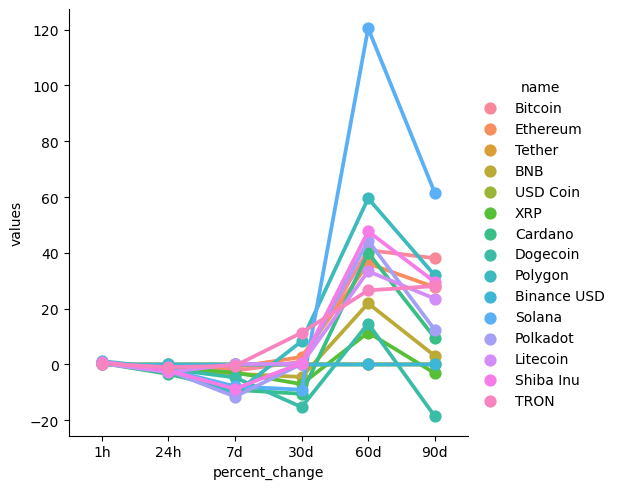

In [75]:
sns.catplot(x = 'percent_change', y = 'values', hue='name', data=df7, kind='point')

In [77]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,23271.64470,2023-03-02 17:47:54.683718
15,Bitcoin,23271.79275,2023-03-02 17:48:55.097348
30,Bitcoin,23487.49064,2023-03-02 19:14:34.071150
45,Bitcoin,23476.69761,2023-03-02 19:15:34.442094
60,Bitcoin,23464.09136,2023-03-02 19:16:35.080521
75,Bitcoin,23438.27407,2023-03-02 19:17:35.582252
90,Bitcoin,23432.34705,2023-03-02 19:18:37.620627


<AxesSubplot: xlabel='timestamp', ylabel='quote.USD.price'>

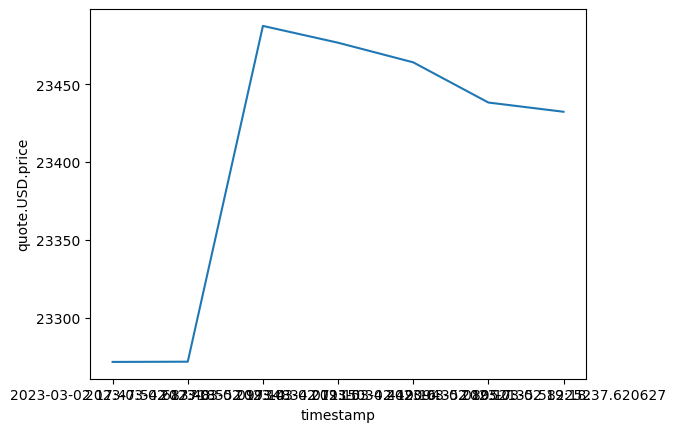

In [78]:
sns.lineplot(x='timestamp',y='quote.USD.price', data=df10)